In [4]:
from sklearn import model_selection 
import pandas as pd
import utils
import numpy as np
from scipy import interpolate
import os


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from collections import Counter

In [20]:
feat = "antibiotic"

In [6]:
data_folder = "/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Hispanic_otu" #MicrobiomeDenoisingData/AGP_2018_biomotu_k7_feces"#"WR_AD")#

plot_folder = "/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/Hispanic_otu/"# str("WR_AD")
#os.mkdir(plot_folder)


#bmc&ComBat&ComBat_with_batch2&ComBat_with_biocovariates&ComBat_with_biocovariates_with_batch2&limma&limma_batch2&pca_regress_out_scale&clr_pca_regress_out_no_scal&clr_pca_regress_out_scale&refactor&refactor_shift1&smartsva
methods = ["raw","bmc","ComBat","ComBat_with_batch2","pca_regress_out_scale_first2","clr_pca_regress_out_no_scale_first2",
           "pca_regress_out_scale_first5","clr_pca_regress_out_no_scale_first5"]

# ["raw","ComBat","ComBat_with_batch2","ComBat_with_biocovariates",
#            "ComBat_with_biocovariates_with_batch2","bmc","pca_regress_out_scale_first5",
#            "clr_pca_regress_out_scale_first5","clr_pca_regress_out_no_scale_first5","pca_regress_out_scale_first2",
#            "clr_pca_regress_out_scale_first2","clr_pca_regress_out_no_scale_first2",
#            "limma","limma_batch2"]
data_type = "otu"

methods_dict = utils.load_data(data_folder,methods,data_type)
#["rel_ab","ComBat_mle","ComBat","percentile_norm","slope_correction","limma","bmc","pca_regress_out"]


raw
bmc
ComBat
ComBat_with_batch2
pca_regress_out_scale_first2
clr_pca_regress_out_no_scale_first2
pca_regress_out_scale_first5
clr_pca_regress_out_no_scale_first5


In [7]:
metadata = pd.read_csv(data_folder + "/metadata.txt",delimiter="\t")

In [8]:
def binarize_labels_mod(labels,pos_labels,none_labels):
    new_labels = []
    for lab in labels:
        if lab in pos_labels:
            new_labels.append(1)
        elif lab in none_labels:
            new_labels.append(None)
        else:
            new_labels.append(0)
    return new_labels


In [21]:
if feat == "antibiotic":
    bin_antibiotic = binarize_labels_mod(metadata["antibiotic"],pos_labels =['1'],none_labels = ["Not provided",float("Nan"),'not provided'])

    Counter(metadata["antibiotic"])
    metadata["bin_antibiotic"] = bin_antibiotic
    column_of_interest = "bin_antibiotic"
    pos_label = 1 #"Healthy"#'1-2' #'0-0.5'#'Omnivore' # '0-1.5'
elif feat == "age_reloc":
    bin_feat = binarize_labels_mod(metadata["agegroup_c6_v2.x"],pos_labels =['1','2','3','4'],none_labels = ["not applicable",float("Nan"),'not provided'])

    metadata[feat] = bin_feat
    column_of_interest = feat
    pos_label = 1 #"Healthy"#'1-2' #'0-0.5'#'Omnivore' # '0-1.5'
    




In [10]:
#Counter(metadata["agegroup_c6_v2.x"])

In [11]:

#Counter(bin_feat)

In [12]:
#Counter(metadata[column_of_interest])

In [22]:
names_orig = ["Random Forest","Naive Bayes"]#,"Nearest Neighbors"]#,"Neural Net", "AdaBoost"] "RBF SVM","Linear SVM",
names = names_orig
#["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
#             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
#             "Naive Bayes"]

all_methods_metrics = dict()
all_methods_means = pd.DataFrame(index = methods, columns= names)
all_methods_auc_stats = dict()

In [23]:
n_repeats = 4
n_splits = 5
for method in methods:
    print(method)
    
    all_methods_auc_stats[method] = dict()
    X = np.array(methods_dict[method].transpose())
    y = np.array(metadata.loc[methods_dict[method].columns][column_of_interest])
    na_mask = pd.isna(y)
    y = y[~na_mask]
    X = X[~na_mask,:]

    rskf = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=n_repeats, random_state=123)
    

    h = .02  # step size in the mesh

    

    metric_classifier = pd.DataFrame(index = list(range(0,10)), columns= names)

#     classifiers = [
#         KNeighborsClassifier(3),
#         SVC(kernel="linear", C=0.025),
#         SVC(gamma=2, C=1),
#         GaussianProcessClassifier(1.0 * RBF(1.0)),
#         DecisionTreeClassifier(max_depth=5),
#         RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#         MLPClassifier(alpha=1, max_iter=1000),
#         AdaBoostClassifier(),
#         GaussianNB(),
#         QuadraticDiscriminantAnalysis()]
    
    
#     "Naive Bayes","AdaBoost","RBF SVM","Linear SVM"

    classifiers = [
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        GaussianNB()] #KNeighborsClassifier(3)]
    #AdaBoostClassifier(),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
#     ,
#         MLPClassifier(alpha=1, max_iter=1000),
#         AdaBoostClassifier()]


    
    
    
    

    # iterate over classifiers
    classifier_it = 0
    for name, clf in zip(names, classifiers):
        print(names[classifier_it])
        all_methods_auc_stats[method][names[classifier_it]]  = dict()
        #print("TRAIN:", train_index, "TEST:", test_index)
           
        #auc_list = [] #pd.DataFrame(index = list(range(n_splits * n_repeats)))
        #tpr_list = [] #pd.DataFrame(index = list(range(n_splits * n_repeats)))
        #fpr_list = [] #pd.DataFrame(index = list(range(n_splits * n_repeats)))
        
        cv_it = 0
        auc_all = []
        y_tr_all = []
        y_pr_all = []

        y_tr = []
        y_pr = []
        for train_index, test_index in rskf.split(X, y):
            #print(cv_it)
            X_train, X_test = X[train_index,], X[test_index,]
            y_train, y_test = y[train_index], y[test_index]
            
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            #print(score)
            metric_classifier.loc[cv_it,names[classifier_it]] = score
            
            y_scores = clf.predict(X_test)
            y_scores_bin = clf.predict_proba(X_test).transpose()[1]
            y_test_bin = utils.binarize_labels(y_test,pos_label =pos_label)
            
            y_tr.append(y_test_bin)
            y_pr.append(y_scores_bin)

            y_tr_all.extend(y_test_bin)
            y_pr_all.extend(y_scores_bin)

            auc = metrics.roc_auc_score(y_test_bin, y_scores_bin)
            #fpr, tpr, thresholds = metrics.roc_curve(y_test_bin, y_scores_bin)
            #fpr_list.append(fpr)
            #tpr_list.append(tpr)
            auc_all.append(auc)
            #auc_matrix.loc[cv_it,:] = auc
            #fpr_matrix.loc[cv_it,:] = fpr
            #tpr_matrix.loc[cv_it,:] = tpr

        
            cv_it += 1
        fpr_all, tpr_all, thresholds_all = metrics.roc_curve(y_tr_all, y_pr_all)
        tpr_i = []
        for s in range(20):
            fpr, tpr, thresholds = metrics.roc_curve(y_tr[s], y_pr[s])
            if not np.isnan(tpr[0]):
                tpr_i.append(interpolate.interp1d(fpr, tpr, 'nearest')(fpr_all))
            
        all_methods_auc_stats[method][names[classifier_it]]['fpr_all'] = fpr_all#auc_matrix
        all_methods_auc_stats[method][names[classifier_it]]['tpr_all'] = tpr_all#auc_matrix
        all_methods_auc_stats[method][names[classifier_it]]['tpr_i'] = tpr_i #auc_matrix
        
        all_methods_auc_stats[method][names[classifier_it]]['auc_all'] = auc_all #auc_matrix
        #all_methods_auc_stats[method][names[classifier_it]]['auc'] = auc_list #auc_matrix
        #all_methods_auc_stats[method][names[classifier_it]]['fpr'] = fpr_list #fpr_matrix
        #all_methods_auc_stats[method][names[classifier_it]]['tpr'] = tpr_list #tpr_matrix
        classifier_it += 1
        

    all_methods_metrics[method] = metric_classifier
    
    
    all_methods_means.loc[method,:] = np.array(pd.DataFrame.mean(metric_classifier,axis =0))
    

raw
Random Forest
Naive Bayes
bmc
Random Forest
Naive Bayes
ComBat
Random Forest
Naive Bayes
pca_regress_out_scale_first2
Random Forest
Naive Bayes
clr_pca_regress_out_no_scale_first5
Random Forest
Naive Bayes
pca_regress_out_scale_first5
Random Forest
Naive Bayes


In [8]:
# one_auc_track1 = []
# one_auc_track2 = []
# one_auc_track3 = []

# for i in range(test.shape[1]):
#     mean,q1,q2 = mean_confidence_interval(test.loc[:,i])
#     one_auc_track1.append(mean)
#     one_auc_track2.append(q1)
#     one_auc_track3.append(q2)

In [24]:
auc_fix = False
for n in names:
    print(n)
    for method in methods:
        print(method)
        if auc_fix:
            print(1-np.mean(all_methods_auc_stats[method][n]['auc_all']))
        else: 
            print(np.mean(all_methods_auc_stats[method][n]['auc_all']))
        

Random Forest
raw
0.5960536753238072
bmc
0.551343632161409
ComBat
0.5570715255699619
pca_regress_out_scale_first2
0.5528449456279115
clr_pca_regress_out_no_scale_first5
0.5472925617338827
pca_regress_out_scale_first5
0.5406834308266558
Naive Bayes
raw
0.5326235588617911
bmc
0.5711849419559982
ComBat
0.574210519023685
pca_regress_out_scale_first2
0.5664440070436302
clr_pca_regress_out_no_scale_first5
0.5643664992202736
pca_regress_out_scale_first5
0.5748872535385819


In [25]:
methods = ["raw","bmc","ComBat","pca_regress_out_scale_first2",
           "clr_pca_regress_out_no_scale_first5","pca_regress_out_scale_first5"]


/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/leahbriscoe/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


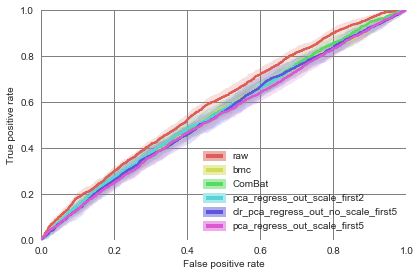

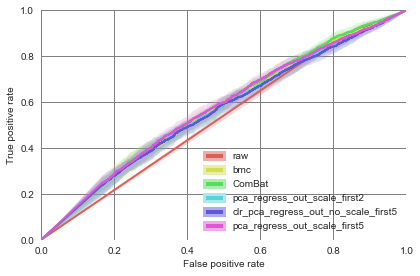

In [26]:
for name in names:    
    text_size = 10
    title = 'ROC curves'
    x_label = 'False positive rate'
    y_label = 'True positive rate'



    nplots=1
    plot_par_factor=2.26
    runs_cv_folds = 10
    plot_alpha=0.2
    fig, ax = plt.subplots(nplots, sharex=True, sharey=True)
    import seaborn as sns
    sns.set()
    current_palette = sns.color_palette()
    #sns.palplot(current_palette)
    palette = sns.color_palette("hls", len(methods))
    plot_color = palette.as_hex()
    plot_marker = ['None','None']
    plot_ls = ['-','--']
    plot_lw = 2
    plot_title = "test"

    for i in range(0,len(methods)):
        #'Naive Bayes''Random Forest'
        if auc_fix:
            fpr_all = 1- np.array(all_methods_auc_stats[methods[i]][name]['fpr_all'])
            tpr_i = 1- np.array(all_methods_auc_stats[methods[i]][name]['tpr_i'])
            tpr_all = 1-np.array(all_methods_auc_stats[methods[i]][name]['tpr_all'])
        else:
            fpr_all = all_methods_auc_stats[methods[i]][name]['fpr_all']
            tpr_i = all_methods_auc_stats[methods[i]][name]['tpr_i']
            tpr_all = all_methods_auc_stats[methods[i]][name]['tpr_all']

        ax.fill_between(fpr_all, tpr_all-np.std(tpr_i, axis=0)*plot_par_factor/np.sqrt(runs_cv_folds), tpr_all+np.std(tpr_i, axis=0)*plot_par_factor/np.sqrt(runs_cv_folds), color=plot_color[i], lw=0, alpha=plot_alpha)
        ax.plot(fpr_all, tpr_all, color=plot_color[i], ls='-', lw=plot_lw, marker=plot_marker[0])

    # fig.subplots_adjust(hspace=0)
    ax.set_xlabel(x_label, size=text_size)
    ax.tick_params(labelsize=text_size, axis='x')
    ax.set_ylabel(y_label, size=text_size)
    ax.tick_params(labelsize=text_size, axis='y')
    #ax.text(plot_title,plot_title,plot_title, va='center', ha='center', size=text_size+2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    # ax.set_yticklabels(ax.get_yticks()[:-1])
    # ax.set_title(title, size=text_size+2)
    #leg = ax.legend()
    #leg_col = [plt.Rectangle((0, 0), 1, 1, fc=s, linewidth=0) for s in plot_color] + [plt.Line2D([0,1], [0,1], c='k', ls='-', lw=2)] + [plt.Line2D([0,1], [0,1], c='k', ls='--', lw=2)]
    #leg = ax.legend(leg_col, prop={'size':text_size}, loc='center left', bbox_to_anchor=(1.02,1), numpoints=1)
    #leg.get_frame().set_alpha(0)

    class LegendObject(object):
        def __init__(self, facecolor='white', edgecolor='white', dashed=False):
            self.facecolor = facecolor
            self.edgecolor = edgecolor
            self.dashed = dashed

        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            width, height = handlebox.width, handlebox.height
            patch = mpatches.Rectangle(
                # create a rectangle that is filled with color
                [x0, y0], width, height, facecolor=self.facecolor,
                # and whose edges are the faded color
                edgecolor=self.edgecolor, lw=3)
            handlebox.add_artist(patch)

            # if we're creating the legend for a dashed line,
            # manually add the dash in to our rectangle
            if self.dashed:
                patch1 = mpatches.Rectangle(
                    [x0 + 2*width/5, y0], width/5, height, facecolor=self.edgecolor,
                    transform=handlebox.get_transform())
                handlebox.add_artist(patch1)

            return patch

    from matplotlib.colors import colorConverter as cc
    import matplotlib.patches as mpatches
    bg = np.array([1, 1, 1])  # background of the legend is white
    colors = plot_color
    # with alpha = .5, the faded color is the average of the background and color
    colors_faded = [(np.array(cc.to_rgb(color)) + bg) / 2.0 for color in colors]

    ax.legend(list(range(6)), methods[0:6],
               handler_map={
                   0: LegendObject(colors[0], colors_faded[0]),
                   1: LegendObject(colors[1], colors_faded[1]),
                   2: LegendObject(colors[2], colors_faded[2]),
                   3: LegendObject(colors[3], colors_faded[3]),
                   4: LegendObject(colors[4], colors_faded[4]),
                   5: LegendObject(colors[5], colors_faded[5])
                })
    ax.set_facecolor('white')
    #ax.title('AUC confidence interval plot')
    fig.tight_layout()
    #fig.set_axis_on()
    ax.grid(color = "grey")
    fig.show()


    fig.savefig(str(plot_folder) + '/AUC_' + str(name) + str('.pdf'))


In [17]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/MicrobiomeDenoisingData/WR_AD'

In [32]:
fpr_all = 1-np.array(all_methods_auc_stats[methods[i]]['Naive Bayes']['fpr_all'])

In [33]:
fpr_all

array([1.        , 0.30909091, 0.30909091, 0.30909091, 0.30909091,
       0.30909091, 0.30863636, 0.30863636, 0.30818182, 0.30818182,
       0.30772727, 0.30772727, 0.30727273, 0.30727273, 0.30681818,
       0.30681818, 0.30636364, 0.30636364, 0.30590909, 0.30590909,
       0.30545455, 0.30545455, 0.305     , 0.305     , 0.30454545,
       0.30454545, 0.30409091, 0.30409091, 0.30363636, 0.30363636,
       0.30318182, 0.30318182, 0.30272727, 0.30272727, 0.30227273,
       0.30227273, 0.30181818, 0.30181818, 0.30136364, 0.30136364,
       0.30090909, 0.30090909, 0.30045455, 0.30045455, 0.3       ,
       0.3       , 0.29909091, 0.29909091, 0.29863636, 0.29863636,
       0.29818182, 0.29818182, 0.29772727, 0.29772727, 0.29727273,
       0.29727273, 0.29681818, 0.29681818, 0.29636364, 0.29636364,
       0.29590909, 0.29590909, 0.29545455, 0.29545455, 0.295     ,
       0.295     , 0.29454545, 0.29454545, 0.29409091, 0.29409091,
       0.29363636, 0.29363636, 0.29318182, 0.29318182, 0.29272